<h1 style="color:blue; text-align:center;">Logistic Regression</h1>


<h2>Load the Preprocessed Dataset</h2>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Dataset/after_preprocessing.csv")
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,0.439024,1,0.24,2,0.455873,0,0,0,0.25,1,...,0.166667,1,0,0.158730,0,0,0,3,2,1
1,0.414634,1,0.12,0,0.223615,2,0,0,0.25,1,...,0.666667,0,1,0.198413,0,0,0,2,0,0
2,0.780488,1,0.12,0,0.291965,1,0,0,0.75,1,...,0.333333,2,1,0.587302,0,0,1,2,1,1
3,0.975610,1,0.86,3,0.288079,1,3,2,0.00,1,...,0.666667,0,1,0.746032,0,0,0,3,1,0
4,0.512195,1,0.46,0,0.226362,2,0,0,0.00,1,...,1.000000,1,0,0.341270,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73910,0.780488,0,0.22,0,0.213630,1,0,0,0.25,1,...,0.333333,2,2,0.261905,0,0,1,3,3,0
73911,0.000000,1,0.06,2,0.456611,1,0,2,0.75,0,...,0.000000,2,1,0.563492,0,0,0,1,2,0
73912,0.097561,0,0.26,4,0.450178,1,0,2,0.00,1,...,0.333333,0,2,0.214286,0,1,0,2,2,1
73913,0.121951,1,0.14,0,0.114253,1,3,0,0.00,0,...,0.000000,0,0,0.055556,0,0,0,2,1,0


## Splitting the Dataset

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59132, 22), (59132,), (14783, 22), (14783,))

<h2>Train a Logistic Regression Model</h2>

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(14783,))

<h2>Evaluate the Logistic Regression Model</h2>

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 71.41%


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]

print("True Negative:",TN)
print("Flase Postive:",FP)
print("Flase Negative:",FN)
print("True Postive:",TP)


Confusion Matrix:
[[4830 2141]
 [2086 5726]]
True Negative: 4830
Flase Postive: 2141
Flase Negative: 2086
True Postive: 5726


In [10]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      6971
           1       0.73      0.73      0.73      7812

    accuracy                           0.71     14783
   macro avg       0.71      0.71      0.71     14783
weighted avg       0.71      0.71      0.71     14783



<h2>Train a Logistic Regression Model with Adjusted Parameters</h2>

In [11]:
log_reg2 = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg2.fit(X_train, y_train)
y_pred = log_reg2.predict(X_test)

print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.7140634512615842

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      6971
           1       0.73      0.73      0.73      7812

    accuracy                           0.71     14783
   macro avg       0.71      0.71      0.71     14783
weighted avg       0.71      0.71      0.71     14783



<h2>Logistic Regression Model with Standardization and Performance Evaluation</h2>

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

log_reg = LogisticRegression(class_weight='balanced', max_iter=500)
log_reg.fit(X_train_s, y_train)

y_pred = log_reg.predict(X_test_s)

accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Optimized Accuracy: 71.57%
Confusion Matrix:
[[5040 1931]
 [2272 5540]]
True Negative: 5040
False Positive: 1931
False Negative: 2272
True Positive: 5540
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.71      6971
           1       0.74      0.71      0.72      7812

    accuracy                           0.72     14783
   macro avg       0.72      0.72      0.72     14783
weighted avg       0.72      0.72      0.72     14783



<h2>Feature Selection with Chi-Square and Mutual Information</h2>


In [6]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt

Best k for Chi-Square Feature Selection: 15
Best k for Mutual Information Feature Selection: 18


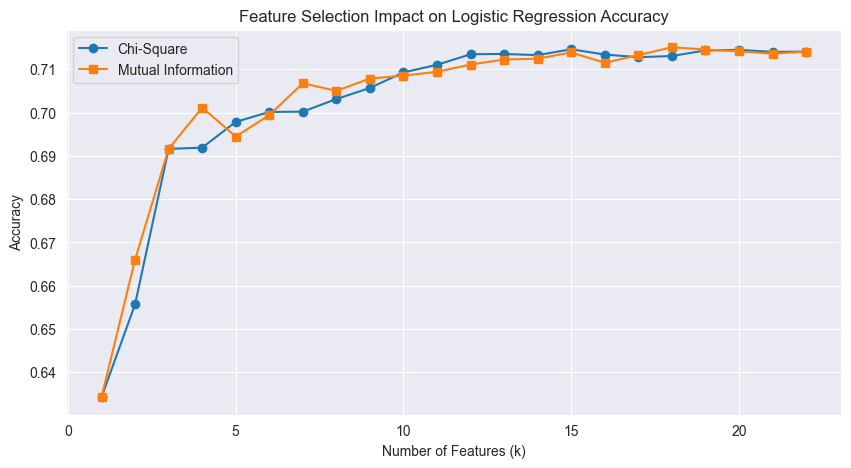

In [14]:
k_values = list(range(1, X_train.shape[1] + 1))
accuracy_chi2 = []
accuracy_mi = []

for k in k_values:
    selector_chi2 = SelectKBest(score_func=chi2, k=k)
    X_train_selected_chi2 = selector_chi2.fit_transform(X_train, y_train)
    X_test_selected_chi2 = selector_chi2.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train_selected_chi2, y_train)

    y_pred_chi2 = logreg.predict(X_test_selected_chi2)
    accuracy_chi2.append(accuracy_score(y_test, y_pred_chi2))

    selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_selected_mi = selector_mi.fit_transform(X_train, y_train)
    X_test_selected_mi = selector_mi.transform(X_test)

    logreg.fit(X_train_selected_mi, y_train)

    y_pred_mi = logreg.predict(X_test_selected_mi)
    accuracy_mi.append(accuracy_score(y_test, y_pred_mi))

best_k_chi2 = k_values[np.argmax(accuracy_chi2)]
best_k_mi = k_values[np.argmax(accuracy_mi)]

print("Best k for Chi-Square Feature Selection:", best_k_chi2)
print("Best k for Mutual Information Feature Selection:", best_k_mi)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_chi2, marker='o', label="Chi-Square")
plt.plot(k_values, accuracy_mi, marker='s', label="Mutual Information")
plt.xlabel("Number of Features (k)")
plt.ylabel("Accuracy")
plt.title("Feature Selection Impact on Logistic Regression Accuracy")
plt.legend()
plt.show()


In [15]:
k = best_k_chi2
selector_chi2 = SelectKBest(score_func=chi2, k=k)
x_train_selected_chi2 = selector_chi2.fit_transform(X_train, y_train)
x_test_selected_chi2 = selector_chi2.transform(X_test)

logreg = LogisticRegression()
logreg.fit(x_train_selected_chi2, y_train)

y_pred_chi2 = logreg.predict(x_test_selected_chi2)
accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)
print("Logistic Regression Accuracy after Chi-Square feature selection:", accuracy_chi2)

Logistic Regression Accuracy after Chi-Square feature selection: 0.7146046134072922


In [16]:
selected_features_chi2 = selector_chi2.get_support(indices=True)
selected_feature_names_chi2 = X_train.columns[selected_features_chi2]

print("Selected Features (Chi-Square):", list(selected_feature_names_chi2))

Selected Features (Chi-Square): ['Age', 'Gender', 'Years at Company', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Remote Work', 'Company Reputation']


In [17]:
k = best_k_mi
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
x_train_selected_mi = selector_mi.fit_transform(X_train, y_train)
x_test_selected_mi = selector_mi.transform(X_test)

# Train Logistic Regression model
logreg.fit(x_train_selected_mi, y_train)

# Evaluate model
y_pred_mi = logreg.predict(x_test_selected_mi)
accuracy_mi = accuracy_score(y_test, y_pred_mi)
print("Logistic Regression Accuracy after Mutual Information feature selection:", accuracy_mi)


Logistic Regression Accuracy after Mutual Information feature selection: 0.7127105458973145


In [18]:
selected_features_mi = selector_mi.get_support(indices=True)
selected_feature_names_mi = X_train.columns[selected_features_mi]

print("Selected Features (Mutual Information):", list(selected_feature_names_mi))

Selected Features (Mutual Information): ['Age', 'Gender', 'Years at Company', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Remote Work', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


<h2>Visualize Coefficients</h2>

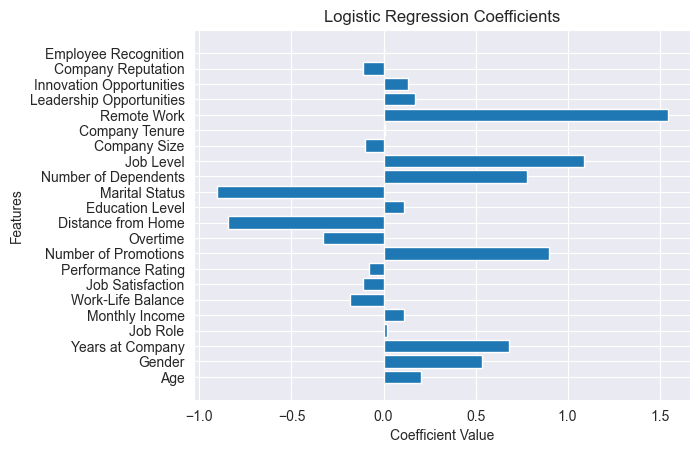

In [10]:
coefficients = log_reg.coef_[0]
plt.barh(X.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficients')
plt.show()

<h2>Visualize ROC Curve</h2>

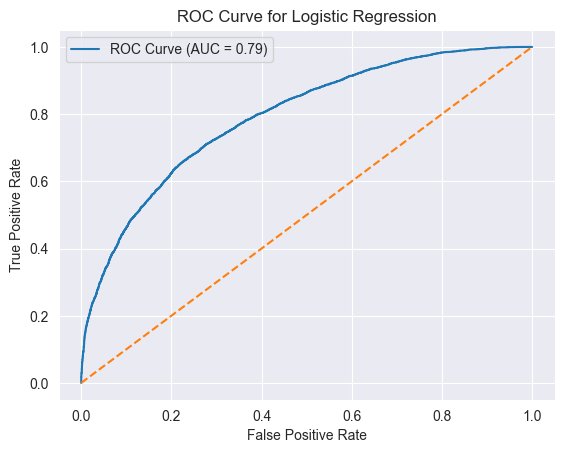

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()